In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

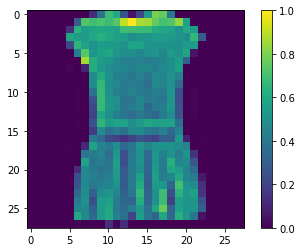

In [62]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

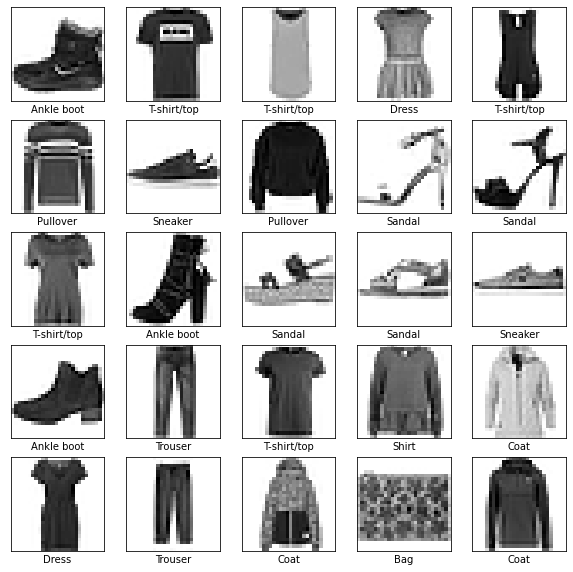

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [70]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2384 - accuracy: 0.9118
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2319 - accuracy: 0.9141
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2227 - accuracy: 0.9164
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2149 - accuracy: 0.9197
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2071 - accuracy: 0.9231
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1997 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1920 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1869 - accuracy: 0.9303
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1810 - accuracy: 0.9326
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [74]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3221 - accuracy: 0.8980 - 898ms/epoch - 3ms/step

Test accuracy: 0.8980000019073486


In [75]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [76]:
predictions = probability_model.predict(test_images)

In [79]:
predictions[300]

array([1.0166089e-03, 3.2387350e-05, 3.4261048e-02, 3.0428408e-05,
       7.5561976e-01, 1.2856349e-07, 2.0877565e-01, 8.3399163e-07,
       2.5838308e-04, 4.7834715e-06], dtype=float32)

In [83]:
np.argmax(predictions[500])

2

In [84]:
test_labels[0]

9

In [85]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

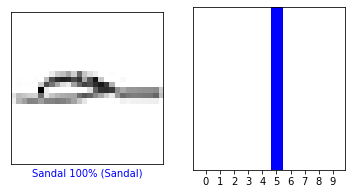

In [90]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

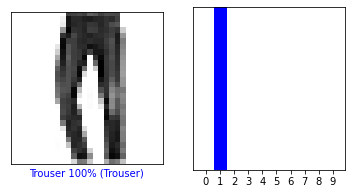

In [91]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

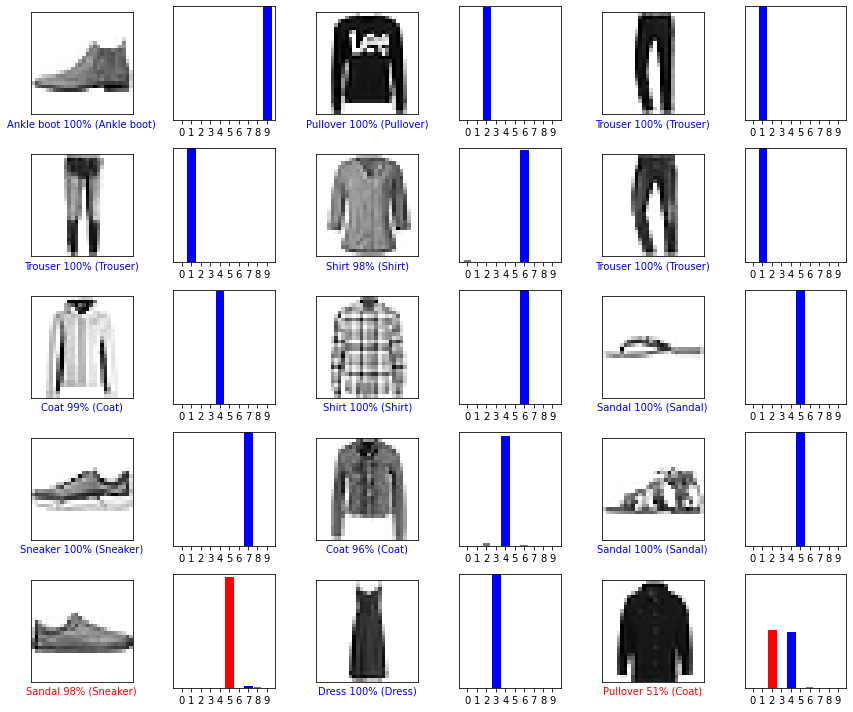

In [92]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [93]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [94]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [95]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.16428787e-04 1.85189253e-06 9.96268868e-01 3.32163700e-06
  2.24485761e-03 1.11144175e-07 9.62273858e-04 2.51873360e-07
  1.52100847e-06 4.58012892e-07]]


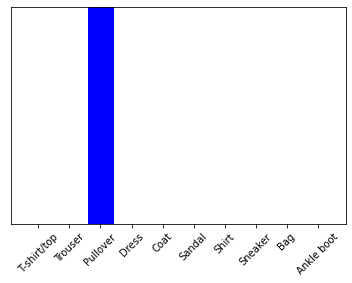

In [96]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [97]:
np.argmax(predictions_single[0])

2